# Introduction

**Resources**

* [Stanford Dogs Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/) - subset of ImageNet dataset

# Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image           # show example images
import scipy.io                   # needed to read .mat files

# Stanford Dogs Dataset

Where to download and unpack dataset? Folder will be created if doesn't exist.

In [2]:
dataset_location = './stanford-dogs/'

**Download and Extract**

In [3]:
def download(url, dest, md5sum):
    import os
    import urllib
    import hashlib

    folder, file = os.path.split(dest)
    if folder != '':
        os.makedirs(folder, exist_ok=True)
    if not os.path.isfile(dest):
        print('Downloading', file, '...')
        urllib.request.urlretrieve(url, dest)
    else:
        print('Already Exists:', file)
    assert hashlib.md5(open(dest, 'rb').read()).hexdigest() == md5sum

In [4]:
download(url='http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar',
         dest=os.path.join(dataset_location, 'images.tar'),
         md5sum='1bb1f2a596ae7057f99d7d75860002ef')
download(url='http://vision.stanford.edu/aditya86/ImageNetDogs/lists.tar',
         dest=os.path.join(dataset_location, 'lists.tar'),
         md5sum='edbb9f16854ec66506b5f09b583e0656')

Already Exists: images.tar
Already Exists: lists.tar


In [5]:
def extract(src, dest):
    import os
    import tarfile
    
    path, file = os.path.split(src)
    extract_path, _ = os.path.splitext(src)
    already_extracted = os.path.isdir(dest)
    if not already_extracted:
        with tarfile.open(src, 'r') as zf:
            print('Extracting', file, '...')
            zf.extractall(dest)
    else:
        print('Already Extracted:', file)       
    assert os.path.isdir(extract_path)

In [6]:
extract(src=os.path.join(dataset_location, 'images.tar'),
        dest=os.path.join(dataset_location, 'images'))
extract(src=os.path.join(dataset_location, 'lists.tar'),
        dest=os.path.join(dataset_location, 'lists'))

Already Extracted: images.tar
Already Extracted: lists.tar


**Load Train Set**

Train set is composed of 12000 images split evenly between 120 classes

In [7]:
train_list = scipy.io.loadmat(os.path.join(dataset_location, 'lists/train_list.mat'))
train_files = np.array([item[0][0] for item in train_list['file_list']])
train_labels = train_list['labels'].flatten() - 1   # convert labels [1..120] -> [0..199]

In [8]:
print(train_files.shape)
print(train_files)

(12000,)
['n02085620-Chihuahua/n02085620_5927.jpg'
 'n02085620-Chihuahua/n02085620_4441.jpg'
 'n02085620-Chihuahua/n02085620_1502.jpg' ...
 'n02116738-African_hunting_dog/n02116738_6754.jpg'
 'n02116738-African_hunting_dog/n02116738_9333.jpg'
 'n02116738-African_hunting_dog/n02116738_2503.jpg']


In [9]:
print(train_labels.shape)
print(train_labels)

(12000,)
[  0   0   0 ... 119 119 119]


**Load Test Set**

Test set is not balanced, each class contains between 48 and 152 images.

In [10]:
test_list = scipy.io.loadmat(os.path.join(dataset_location, 'lists/test_list.mat'))
test_files = [item[0][0] for item in test_list['file_list']]
test_labels = test_list['labels'] -1      # convert labels [1..120] -> [0..199]

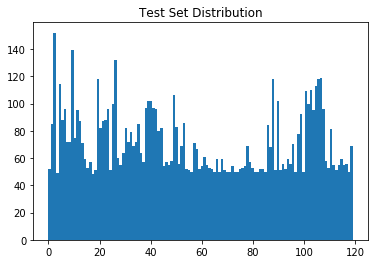

In [11]:
plt.hist(test_labels.ravel(), bins=120)
plt.title('Test Set Distribution');

**Create Human Readable Tags**

In [35]:
idx_to_tags = np.array([x.split('-')[1] for x in sorted(os.listdir('./stanford-dogs/images/Images/'))])
print(idx_to_tags.shape)
print(idx_to_tags[:5])

(120,)
['Chihuahua' 'Japanese_spaniel' 'Maltese_dog' 'Pekinese' 'Shih']


**Explore**

Show image

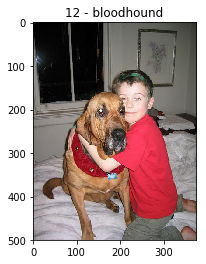

In [36]:
idx = 1234
img = matplotlib.image.imread(os.path.join(dataset_location, 'images/Images', train_files[idx]))
label = train_labels[idx]
plt.imshow(img)
plt.title(str(label) + ' - ' + idx_to_tags[label]);

Show raw

In [37]:
idx = 1234
img = matplotlib.image.imread(os.path.join(dataset_location, 'images/Images', train_files[idx]))
print(type(img))
print(img.shape)
print(img.dtype)
print(img[:,:,0])  # red channel [0..255]

<class 'numpy.ndarray'>
(500, 375, 3)
uint8
[[  2   0   1 ...  49  49  48]
 [  3   1   1 ...  50  49  48]
 [  5   1   0 ...  50  49  49]
 ...
 [129 131 135 ... 122 119 116]
 [134 136 139 ... 120 117 115]
 [139 141 143 ... 118 116 114]]


**Save to .npz**

In [38]:
save_path = os.path.join(dataset_location, 'stanford-dogs.npz')
save_path

'./stanford-dogs/stanford-dogs.npz'

In [39]:
np.savez(save_path,
         train_files=train_files,
         train_labels=train_labels,
         test_files=test_files,
         test_labels=test_labels,
         idx_to_tags=idx_to_tags)

**Load and Save Images**

Cells below load all images and convert them to (224,224) resolution. 

In [18]:
# def load_images(folder, files, target_size):
#     images_list = []
#     for file in files:
#         img_full_path = os.path.join(folder, file)
#         img = PIL.Image.open(img_full_path)
#         img = img.resize(target_size)
#         if img.mode == 'RGBA':
#             img = img.convert('RGB')
#         images_list.append(np.array(img))
#     return np.array(images_list)

In [19]:
# train_images = load_images(folder='./stanford-dogs/images/Images', files=train_files, target_size=(224,224))
# test_images = load_images(folder='./stanford-dogs/images/Images', files=test_files, target_size=(224,224))

Save converted images to .npz file. File will be approx *3.1GB*.

In [20]:
# save_path = os.path.join(dataset_location, 'tiny-imagenet-200.npz')
# save_path

In [21]:
# np.savez(save_path,
#          x_train=train_images,
#          y_train=train_labels,
#          x_valid=test_images,
#          y_valid=test_labels,
#          idx_to_tags=idx_to_tags)